# PISA 2012 Data Exploration 

## About PISA

The OECD Programme for International Student Assessment (PISA) surveys, which take place every threeyears, have been designed to collect information about 15-year-old students in participating countries. PISA examines how well students are prepared to meet the challenges of the future, rather than how well they master  particular curricula. 

## Research questions and methodology

Mathematics is an intense subject. Apart from crunching numbers in mind or in calculator, there are various other factors like support from parents and teachers, play an important role in scoring good grades. Not just external support, but how interesting a student find subject, is also of utmost importance. In this document, I will explore the cause and relationship among students scoring mathematics to answer the following questions:

- What is the attitude of students towards scoring high scores in math?
- How parents' education level and occupational status play a role in students’ academia?
- How teachers support their students in advance in their academia?

# Data Exploration

In [46]:
## Load relevant packages
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns

%matplotlib inline
plt.style.use('ggplot')


In [2]:
#read csv file
df = pd.read_csv('pisa2012-b.csv', engine = "python", sep = ',')
df.head()

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,179163,Finland,2460000,FIN0007,OECD,Finland,124,3488,9,1,...,4.1562,25.9485,25.9485,4.1562,4.1562,25.9485,59.0,1.0,0.2472,22-Nov-13
1,179164,Finland,2460000,FIN0007,OECD,Finland,124,3489,9,1,...,4.1562,25.9485,25.9485,4.1562,4.1562,25.9485,59.0,1.0,0.2472,22-Nov-13
2,179165,Finland,2460000,FIN0007,OECD,Finland,124,3490,9,1,...,4.0200,23.4300,23.4300,4.0200,4.0200,23.4300,59.0,1.0,0.2286,22-Nov-13
3,179166,Finland,2460000,FIN0007,OECD,Finland,124,3491,9,1,...,4.1562,25.9485,25.9485,4.1562,4.1562,25.9485,59.0,1.0,0.2472,22-Nov-13
4,179167,Finland,2460000,FIN0007,OECD,Finland,124,3492,9,1,...,4.0200,23.4300,23.4300,4.0200,4.0200,23.4300,59.0,1.0,0.2286,22-Nov-13


In [3]:
#Create another dataframe with selected variables
df1 = df[['CNT', 'ST04Q01','AGE','HISCED','HISEI','ANXMAT','INSTMOT','INTMAT','MATBEH','MATHEFF','MATINTFC','MATWKETH','MMINS','MTSUP',
              'INFOCAR','STUDREL','PV1MATH']]
df1

,CNT,ST04Q01,AGE,HISCED,HISEI,ANXMAT,INSTMOT,INTMAT,MATBEH,MATHEFF,MATINTFC,MATWKETH,MMINS,MTSUP,INFOCAR,STUDREL,PV1MATH
0,Finland,Male,16.00,"ISCED 5A, 6",68.70,-1.00,NaN,NaN,NaN,NaN,NaN,NaN,90.0,-1.6333,0.8708,-0.02,601.6591
1,Finland,Male,15.75,ISCED 5B,56.00,-0.20,NaN,NaN,NaN,NaN,NaN,NaN,90.0,-1.1894,-0.2566,-0.48,550.3272
2,Finland,Female,15.75,ISCED 5B,53.15,-2.37,0.80,0.58,-0.4567,0.54,1.4565,-0.4017,NaN,-0.6577,0.4984,2.16,631.1809
3,Finland,Male,15.67,ISCED 1,26.62,NaN,0.05,-0.66,-2.1402,1.07,-0.1191,-1.1886,225.0,NaN,0.8066,NaN,484.7406
4,Finland,Female,15.58,"ISCED 5A, 6",17.79,NaN,1.59,0.00,-0.4567,0.78,-0.2514,-1.1886,225.0,NaN,0.8708,NaN,670.8288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172486,Montenegro,Female,15.92,"ISCED 3A, ISCED 4",19.78,0.32,0.05,-1.78,-2.1402,-1.36,-1.5329,-1.1886,NaN,-1.4093,NaN,-0.02,429.1245
172487,Montenegro,Male,15.83,ISCED 5B,56.00,NaN,-0.67,0.00,0.8153,-0.18,NaN,-2.1448,180.0,NaN,NaN,NaN,413.0005
172488,Montenegro,Female,16.08,"ISCED 5A, 6",58.77,-1.30,0.50,1.51,0.8110,-0.77,0.6584,1.4298,NaN,0.6709,NaN,-0.02,407.7816
172489,Montenegro,Male,16.17,ISCED 5B,NaN,0.56,-1.12,-0.34,-1.0226,-0.48,-0.7332,-0.5641,NaN,1.1169,NaN,-1.04,397.7333


In [4]:
#Rename columns
df1.rename(columns = {'CNT':'Country' , 'ST04Q01': 'gender','HISCED': 'parents_education', 'AGE':'age' , 'HISEI' : 'parents_occupational_status', 
                     'ANXMAT' :'anxiety_score', 'INSTMOT' : 'motivation_score', 'INTMAT' : 'interest_score', 'MATBEH': 'behaviour_score', 
                      'MATHEFF': 'efficacy_score', 'MATINTFC': 'intention_score', 'MATWKETH': 'work_ethic_score' , 'MMINS' : 'learning_time_min',
                      'MTSUP': 'teacher_support_score', 'INFOCAR': 'career_info_score', 'STUDREL' : 'stu_teach_relation_score' , 
                       'PV1MATH': 'math_score'}, inplace = True) 

/Users/sj/anaconda3/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160287 entries, 0 to 172490
Data columns (total 17 columns):
Country                        160287 non-null object
gender                         160287 non-null object
age                            160287 non-null float64
parents_education              160287 non-null category
parents_occupational_status    160287 non-null float64
anxiety_score                  160287 non-null float64
motivation_score               160287 non-null float64
interest_score                 160287 non-null float64
behaviour_score                160287 non-null float64
efficacy_score                 160287 non-null float64
intention_score                160287 non-null float64
work_ethic_score               160287 non-null float64
learning_time_min              160287 non-null float64
teacher_support_score          160287 non-null float64
career_info_score              160287 non-null float64
stu_teach_relation_score       160287 non-null float64
math_score

In [6]:
#Convert parent education into category variable in an orderly fashion
level_order = ['None', 'ISCED 1 ', 'ISCED 2', 'ISCED 3B, C' , 'ISCED 3A, ISCED 4', 'ISCED 5B', 'ISCED 5A, 6']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
df1['parents_education'] = df1['parents_education'].astype(ordered_cat)

/Users/sj/anaconda3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [7]:
#Fill Nan values with mean
df1.fillna(df1.mean(), inplace=True)

/Users/sj/anaconda3/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [8]:
#Drop Nan values for categorical variables
df1.dropna(inplace = True)

/Users/sj/anaconda3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Distribution of math score

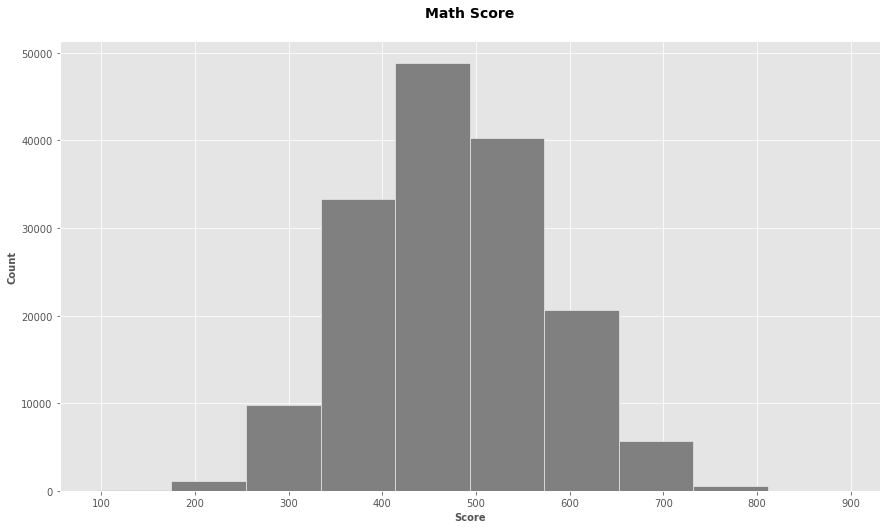

In [69]:
#Plot histogram for math score
plt.figure(figsize=[14.70, 8.27])
plt.hist(df1.math_score, color = 'grey', edgecolor =("white"))
plt.title('Math score'.title(), fontsize = 14, weight = "bold", y = 1.04)
plt.xlabel('score'.title(), fontsize = 10, weight = "bold")
plt.ylabel('count'.title(), fontsize = 10, weight = "bold");

The math score is normally distributed which gives a general idea that most students are performing well. 

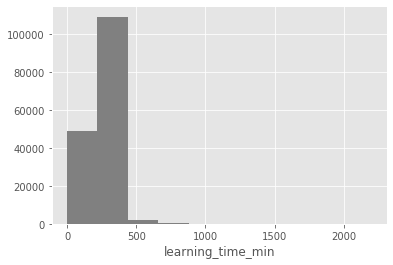

In [10]:
#Plot histogram for learning time
plt.hist(df1.learning_time_min, color = 'grey');
plt.xlabel('learning_time_min')
plt.show()

The graph is right skewed distribution. Looking at the graph and descriptive statistics above, one can say that there is a presence of outliers. At this moment I will remove the outlier by setting quantiles 0.01 to 0.99 and see the distribution changes.

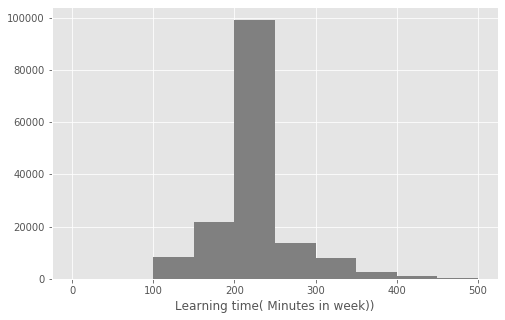

''

In [11]:
##Remove outlier
#Set quantiles 0.01 to 0.99 
q_low = df1["learning_time_min"].quantile(0.01)
q_hi  = df1["learning_time_min"].quantile(0.99)
q_low
df2 = df1[(df1["learning_time_min"] < q_hi) & (df1["learning_time_min"] > q_low)]


#Plot histogram
binsize = 50
bins = np.arange(0, df2['learning_time_min'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df2, x = 'learning_time_min', bins = bins, color = 'grey')
plt.xlabel('Learning time( Minutes in week))')
plt.show()
;

The distribution looks normal now.

Since the data is huge, going forward I will take a sample size of 1000 cases for further exploration.

In [12]:
#Select sample size of 1000
samples = np.random.choice(df2.shape[0], 1000, replace = False)
df2_samp = df2.loc[samples,:]

/Users/sj/anaconda3/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


## Gender-wise math score 

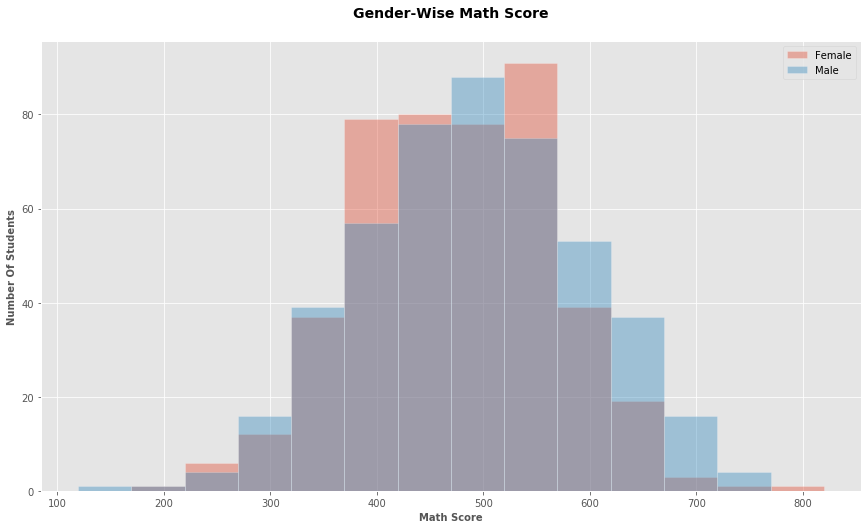

In [70]:
#plot histogram to see gender wise overall math score
binsize=50
bins=np.arange(min(df2_samp['math_score']),max(df2_samp['math_score'])+binsize, binsize)

plt.figure(figsize=[14.70, 8.27])

plt.hist(data=df2_samp.query('gender=="Female"'),x='math_score', alpha=.4,bins=bins,label='Female', edgecolor =("white"))
plt.hist(data=df2_samp.query('gender=="Male"'),x='math_score', alpha=.4,bins=bins, label='Male', edgecolor =("white"))
plt.title('Gender-wise Math Score'.title(), fontsize = 14, weight = "bold", y = 1.04)
plt.xlabel('Math score'.title(), fontsize = 10, weight = "bold")
plt.ylabel('Number of students'.title(),fontsize = 10, weight = "bold")
plt.legend();

Overall, males are more consistent in scoring than females.

## Gender wise linear regression between learning time and math score

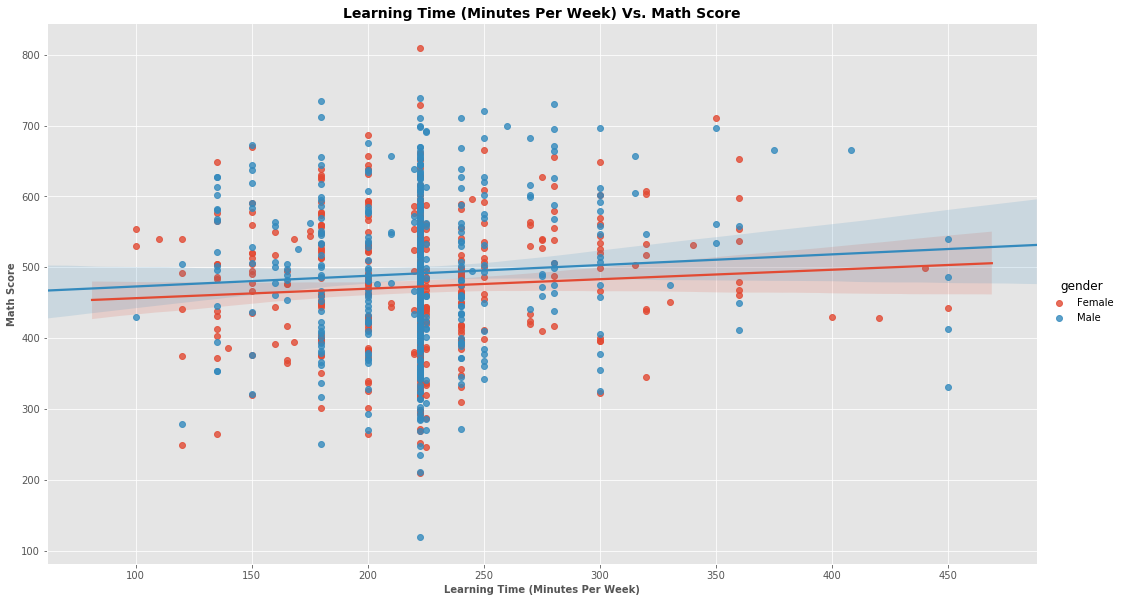

In [67]:
## Plot linear regrression between learning time and math score
g = sns.lmplot(x='learning_time_min',y='math_score', hue = 'gender', data=df2_samp, 
               height = 8.27,  aspect = (14.70)/(8.27))
plt.title("Learning time (minutes per week) vs. math score".title(), fontsize = 14, weight = "bold", y = 1.04)
plt.xlabel( 'Learning time (minutes per week)'.title(), fontsize = 10, weight = "bold")
plt.ylabel( 'Math score'.title(), fontsize = 10, weight = "bold");

The learning time spent per week has positive correlation with the math score. Further, Males seem to put in more time to study when compared to females, resulting in higher scores.

# Correlation matrix

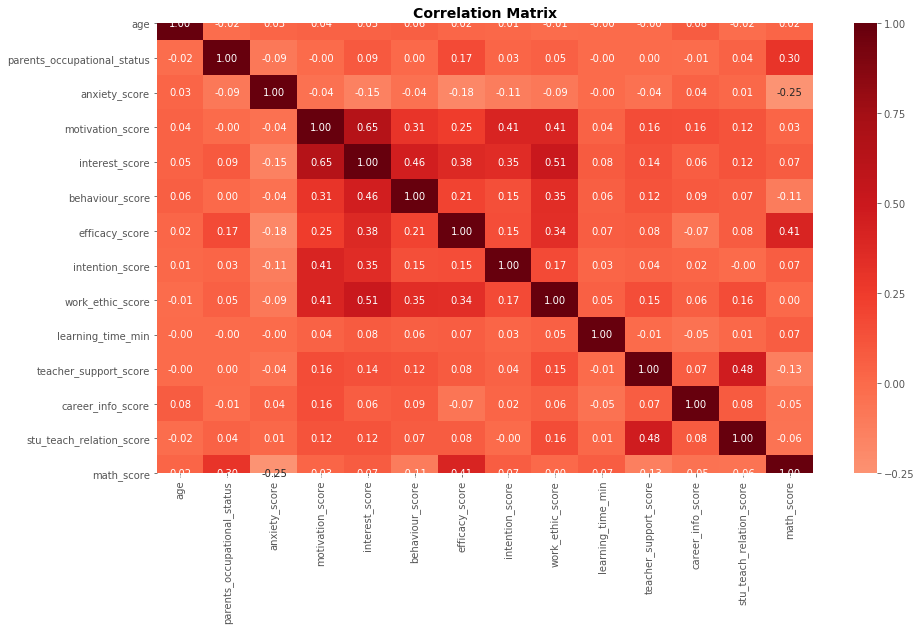

In [53]:
# Plot heatmap to see correlation between 2 variables
plt.figure(figsize=[14.70, 8.27])
sns.heatmap(df2_samp.corr(), annot = True, fmt = '.2f', cmap = 'Reds', center = 0)
plt.title("Correlation Matrix".title(), fontsize = 14, weight = "bold", y = 1.04)
plt.show()

1. Math score is highst positively correlated with efficacy score and parents occupational status and highest negatively correlated with anxiety score.
3. Motivation, interest, behavior, efficacy, intention and work ethic scores are all positively correlated with each other (>0.20). Further, each one of them is negatively correlated with anxiety score.
4. Interestingly, teacher support and their relations with students are negatively correlated with math score. Career info score is moderately correlated with math score. 

## Interaction between parents education level with math score and anxiety score

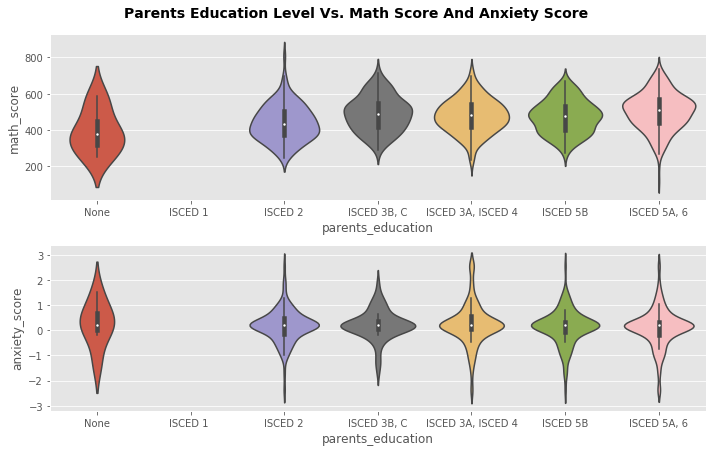

In [73]:
#plot violin plot to see the trend of parents education level with the math score and anxiety score 
plt.figure(figsize = [10,6])

# subplot 1: parents occupational status vs parents education
plt.subplot(2, 1, 1)
sns.violinplot(data = df2_samp, y = 'math_score', x = 'parents_education', height = 8.27/2,  aspect = (14.70)/(8.27/2))

# subplot 3: anxiety score vs parents education
ax = plt.subplot(2, 1, 2)
sns.violinplot(data = df2_samp, y = 'anxiety_score', x = 'parents_education', height = 8.27/2,  aspect = (14.70)/(8.27/2))
plt.suptitle("Parents education level vs. math score and anxiety score".title(),fontsize = 14, weight = "bold", y = 1.04)
plt.tight_layout()
plt.show();

The median score of the students increases with the increase in education level of their parents. However, the anxiety issues is equally spread out on all education levels which means Sutdent's anxiety levels are not correlated with parents' education levels.

## Relationship between math score and parents occupational status around the world

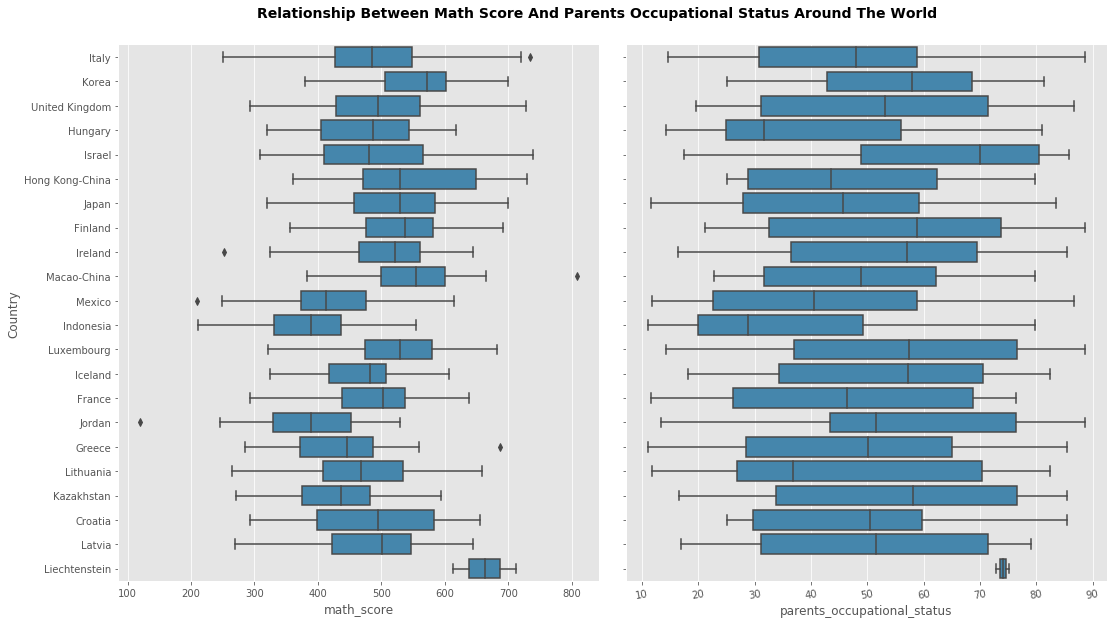

In [43]:
#Create boxplot to compare math score and parents occupation status around the world
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sns.color_palette()[1]
    sns.boxplot(x, y, color = default_color)

#plt.figure(figsize = [9, 9])
g = sns.PairGrid(data = df2_samp, x_vars = ['math_score', 'parents_occupational_status'], y_vars = 'Country', 
                 height = 8.27,  aspect = (14.70/2)/(8.27))
g.map(boxgrid)
plt.suptitle("Relationship between math score and parents occupational status around the world".title(),
               fontsize = 14, weight = "bold", y = 1.04)
plt.xticks(rotation = 10)
plt.show();

The math score is correlated with occupation status of the parents for all the countries except China, Israel, Kazakhstan and Jordan. This means, all over the world, it is seen that parents occupational status has direct impact on students performance.

## Relationship between math score and student teacher relationship around the world

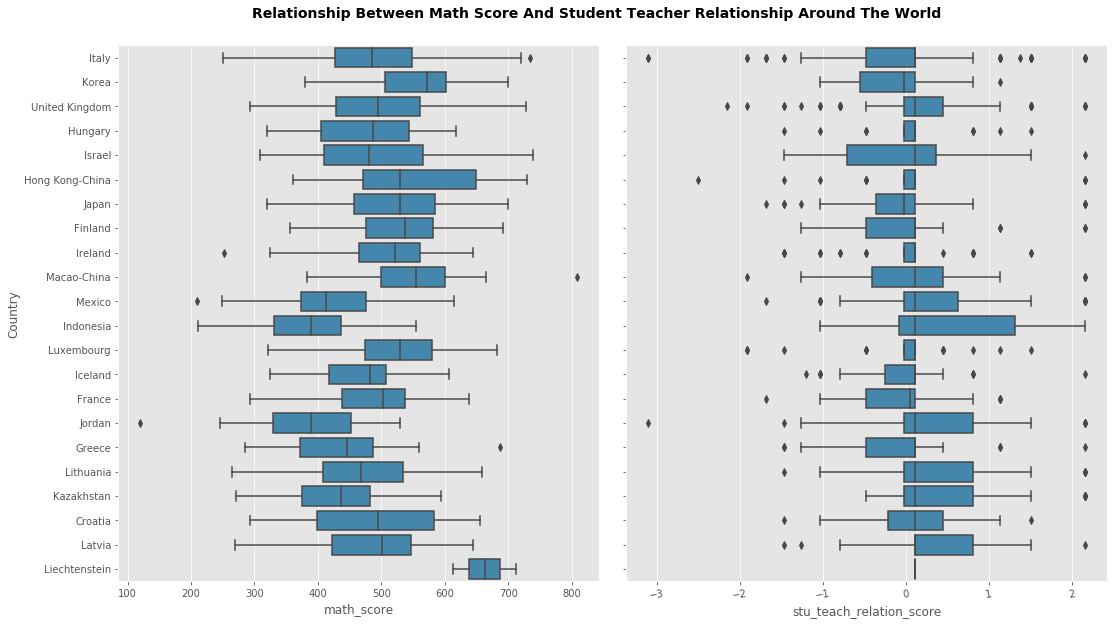

In [40]:
#Create boxplot to compare math score and student teacher relationship around the world
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sns.color_palette()[1]
    sns.boxplot(x, y, color = default_color)

g = sns.PairGrid(data = df2_samp, x_vars = ['math_score', 'stu_teach_relation_score'], 
                 y_vars = 'Country', height = 8.27,  aspect = (14.70/2)/(8.27))

g.map(boxgrid)
plt.suptitle("Relationship between math score and student teacher relationship around the world".title(),
               fontsize = 14, weight = "bold", y = 1.04)
plt.xticks(rotation = 10)
plt.show();

The median student- teacher relation score for Countries like Mexico, UK, Kazakhstan, Jordan and Indonesia is positive (>0) with the median math scores below 500. On the contrary, the median student- teacher relation score for Countries like Italy, Japan, Macao-China, Hong-Kong, France and Hungary is negative (<0) with the median math scores above 500. This confirms there is negative correlation between Teacher relations with students and math score.

### Summary of findings:

- What is the attitude of students towards scoring high scores in math?
    
    Students having positive attitude (i.e, self- efficacy, interests, motivations, behavior and work ethic) towards math scores better. Students having anxiety issues may feel stressed which in turn have negative impact on the scores.Males put in more efforts in learning math and have better success compared to females.

- How parents' education level and occupational status play a role in students’ academia?

    Parents' education level and occupational status have direct impact on students' performance. It is safe to assume that the more educated the parents are, the better attitude would students have towards math’s. 
    
- How teachers support their students in advance in their academia?
   
   Interestingly, teachers' support and their relations with student have negative impact on students’ performance. It is seen that if the students have teachers' support, then they under perform. On the contrary, if the student does not have teacher's support, they put in more efforts and score higher marks.